In [1]:
# Importing necesaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
car_park=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Desktop/Iconsult/Illegaly Parked Cars_2021-2022_final.csv")
car_park.head()

,OBJECTID,Date,Dispatcher,Address,Notes,LicensePlate,GlobalID,Resolved,Street Impassible,x,y
0,1,11/22/21 6:03,Cathy Lopez,"Whittier, Bryant and Tennyson",Multiple 83's on all of these streets while DP...,NaN,b8345f1b-ae49-4c93-8390-2ad4569ca5a7,NaN,Yes,-76.181246,43.047374
1,2,12/9/21 1:15,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Dark colored suv--parked illegally,NaN,d36eba27-81af-4a11-a86d-b62d17f4b1e7,NaN,Yes,-76.175294,43.045130
2,3,12/9/21 1:22,Dave Rustay,265-267 Bryant Ave,impassable--parked illegally,NaN,b51d3e89-45bb-47b9-b611-94b9d5f61316,NaN,Yes,-76.182287,43.045984
3,4,12/9/21 1:32,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),One vehicle--parked illegally,NaN,afa0cc81-890c-41a8-873a-a18743e5618b,NaN,Yes,-76.188009,43.044608
4,5,12/9/21 1:46,Dave Rustay,Walnut Av(Harrison St & Madison St),multiple 83's--parked illegally,NaN,9f4e8944-6b27-464e-91b2-e417683556fa,NaN,Yes,-76.132193,43.044838


In [3]:
# Info on the dataset
car_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           862 non-null    int64  
 1   Date               855 non-null    object 
 2   Dispatcher         852 non-null    object 
 3   Address            856 non-null    object 
 4   Notes              557 non-null    object 
 5   LicensePlate       52 non-null     object 
 6   GlobalID           862 non-null    object 
 7   Resolved           0 non-null      float64
 8   Street Impassible  862 non-null    object 
 9   x                  862 non-null    float64
 10  y                  862 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 74.2+ KB


In [4]:
# Droping columns that won't be required
car_park.drop(['GlobalID','Resolved','LicensePlate','Notes','OBJECTID'],axis=1,inplace=True)

In [5]:
# Changing the datatype
car_park['Date']=pd.to_datetime(car_park['Date'])

In [6]:
car_park.head()

,Date,Dispatcher,Address,Street Impassible,x,y
0,2021-11-22 06:03:00,Cathy Lopez,"Whittier, Bryant and Tennyson",Yes,-76.181246,43.047374
1,2021-12-09 01:15:00,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Yes,-76.175294,43.045130
2,2021-12-09 01:22:00,Dave Rustay,265-267 Bryant Ave,Yes,-76.182287,43.045984
3,2021-12-09 01:32:00,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),Yes,-76.188009,43.044608
4,2021-12-09 01:46:00,Dave Rustay,Walnut Av(Harrison St & Madison St),Yes,-76.132193,43.044838


In [7]:
# Checking all of our Dispatcher Names
car_park['Dispatcher'].value_counts()

Cathy Lopez          235
Dave R               209
Lisa                 175
Lisa Collins          56
Cathy                 54
Grandinetti           54
lisa                  32
DaveR                 11
Dave Rustay           10
Frank Grandinetti      4
Lisa`                  3
Hall                   2
Davr R                 1
TESTING                1
Lisa Collins200        1
Dav e R                1
Rustay                 1
cathy                  1
Dav R                  1
Name: Dispatcher, dtype: int64

In [8]:
# Combining the Names that are similar.
car_park.replace('Cathy','Cathy Lopez',inplace=True)
car_park.replace('cathy','Cathy Lopez',inplace=True)
car_park.replace('Lisa','Lisa Collins',inplace=True)
car_park.replace('lisa','Lisa Collins',inplace=True)
car_park.replace('Lisa Collins200','Lisa Collins',inplace=True)
car_park.replace('Dave R','Dave Rustay',inplace=True)
car_park.replace('Davr R','Dave Rustay',inplace=True)
car_park.replace('Dav e R','Dave Rustay',inplace=True)
car_park.replace('Dav R','Dave Rustay',inplace=True)
car_park.replace('DaveR','Dave Rustay',inplace=True)
car_park.replace('Rustay','Dave Rustay',inplace=True)
car_park.replace('Grandinetti','Frank Grandinetti',inplace=True)
car_park.replace('Lisa`','Lisa Collins',inplace=True)

In [9]:
# Checking results
car_park['Dispatcher'].value_counts()

Cathy Lopez          290
Lisa Collins         267
Dave Rustay          234
Frank Grandinetti     58
Hall                   2
TESTING                1
Name: Dispatcher, dtype: int64

In [10]:
# No. of vehicles dispatched by a Dispatcher on a particular date
da=car_park.groupby(['Date'])['Dispatcher'].count().sort_values(ascending=False).reset_index()
da.head()

,Date,Dispatcher
0,2022-01-25 13:19:00,2
1,2022-01-11 04:29:00,2
2,2022-03-28 03:50:00,2
3,2022-02-06 03:09:00,2
4,2022-02-04 01:25:00,2


In [11]:
#conda install geopandas

In [12]:
car_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               855 non-null    datetime64[ns]
 1   Dispatcher         852 non-null    object        
 2   Address            856 non-null    object        
 3   Street Impassible  862 non-null    object        
 4   x                  862 non-null    float64       
 5   y                  862 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 40.5+ KB


In [13]:
import datetime 
dt=datetime.datetime.today()

In [14]:
# Creating a New Column day
car_park['Day']=car_park['Date'].dt.day_name()

In [15]:
car_park['Date_New']=pd.to_datetime(car_park['Date']).dt.date
car_park['Time']=pd.to_datetime(car_park['Date']).dt.time

In [16]:
# Dropping old date column

car_park.drop(['Date'],axis=1,inplace=True)

In [17]:
car_park.head()

,Dispatcher,Address,Street Impassible,x,y,Day,Date_New,Time
0,Cathy Lopez,"Whittier, Bryant and Tennyson",Yes,-76.181246,43.047374,Monday,2021-11-22,06:03:00
1,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Yes,-76.175294,43.045130,Thursday,2021-12-09,01:15:00
2,Dave Rustay,265-267 Bryant Ave,Yes,-76.182287,43.045984,Thursday,2021-12-09,01:22:00
3,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),Yes,-76.188009,43.044608,Thursday,2021-12-09,01:32:00
4,Dave Rustay,Walnut Av(Harrison St & Madison St),Yes,-76.132193,43.044838,Thursday,2021-12-09,01:46:00


In [18]:
car_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dispatcher         852 non-null    object 
 1   Address            856 non-null    object 
 2   Street Impassible  862 non-null    object 
 3   x                  862 non-null    float64
 4   y                  862 non-null    float64
 5   Day                855 non-null    object 
 6   Date_New           855 non-null    object 
 7   Time               855 non-null    object 
dtypes: float64(2), object(6)
memory usage: 54.0+ KB


In [19]:
# Changing the data type of Date_New and Time
car_park['Date_New']=pd.to_datetime(car_park['Date_New'])

In [20]:
# Conditional Formatting
car_park[(car_park['Dispatcher']=='Dave Rustay') & (car_park['Date_New']=='2021-12-09')]

,Dispatcher,Address,Street Impassible,x,y,Day,Date_New,Time
1,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Yes,-76.175294,43.045130,Thursday,2021-12-09,01:15:00
2,Dave Rustay,265-267 Bryant Ave,Yes,-76.182287,43.045984,Thursday,2021-12-09,01:22:00
3,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),Yes,-76.188009,43.044608,Thursday,2021-12-09,01:32:00
4,Dave Rustay,Walnut Av(Harrison St & Madison St),Yes,-76.132193,43.044838,Thursday,2021-12-09,01:46:00
5,Dave Rustay,100 block Wolcott Ave(Off Bellevue Av),Yes,-76.182997,43.032305,Thursday,2021-12-09,02:02:00
6,Dave Rustay,411 University Av(E.Genesee St & Madison St),Yes,-76.134095,43.045858,Thursday,2021-12-09,02:09:00
7,Dave Rustay,1312 Madison St(S.Beech St & Cherry St),Yes,-76.124471,43.044978,Thursday,2021-12-09,02:18:00
8,Dave Rustay,Marshall St(Ostrom Av & Comstock Av),Yes,-76.129572,43.041605,Thursday,2021-12-09,03:08:00


In [21]:
# No. of vehicles dispatched by a Dispatcher on a particular day
day=car_park.groupby(['Dispatcher'])['Day'].count().sort_values(ascending=False).reset_index()
day.head()

,Dispatcher,Day
0,Cathy Lopez,290
1,Lisa Collins,267
2,Dave Rustay,234
3,Frank Grandinetti,58
4,Hall,2


In [22]:
# Renaming the column name to Count
day.rename(columns={'Day':'Count'},inplace=True)
day.head()

,Dispatcher,Count
0,Cathy Lopez,290
1,Lisa Collins,267
2,Dave Rustay,234
3,Frank Grandinetti,58
4,Hall,2


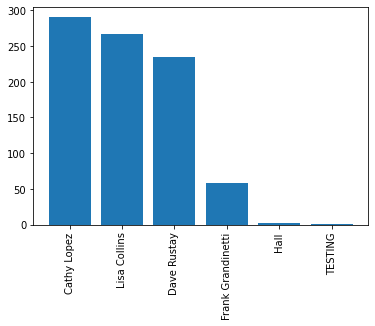

In [23]:
plt.bar(day.Dispatcher,day.Count)
plt.xticks(rotation=90)
plt.show()

In [24]:
# By a particular day
disp=car_park.groupby(['Day'])['Date_New'].count().sort_values(ascending=False).reset_index()
disp.head(10)

,Day,Date_New
0,Sunday,178
1,Saturday,144
2,Monday,129
3,Tuesday,124
4,Wednesday,102
5,Friday,98
6,Thursday,80


In [25]:
# Renaming the column name to Count
disp.rename(columns={'Date_New':'Count'},inplace=True)
disp.head(10)

,Day,Count
0,Sunday,178
1,Saturday,144
2,Monday,129
3,Tuesday,124
4,Wednesday,102
5,Friday,98
6,Thursday,80


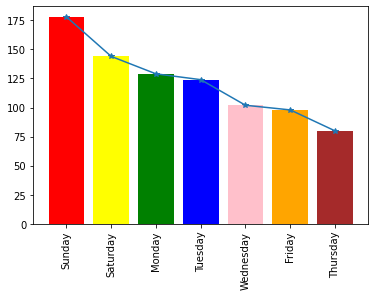

In [26]:
# Day Wise-
plt.bar(disp.Day,disp.Count,color=['red','yellow','green','blue','pink','orange','brown'])
disp['Count'].plot(kind='line',marker="*")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Street Impassible
round(car_park['Street Impassible'].value_counts(normalize=True)*100,2)

Yes    94.55
No      5.45
Name: Street Impassible, dtype: float64

In [28]:
car_park['Month']=car_park['Date_New'].dt.strftime('%B')
car_park.head()

,Dispatcher,Address,Street Impassible,x,y,Day,Date_New,Time,Month
0,Cathy Lopez,"Whittier, Bryant and Tennyson",Yes,-76.181246,43.047374,Monday,2021-11-22,06:03:00,November
1,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Yes,-76.175294,43.045130,Thursday,2021-12-09,01:15:00,December
2,Dave Rustay,265-267 Bryant Ave,Yes,-76.182287,43.045984,Thursday,2021-12-09,01:22:00,December
3,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),Yes,-76.188009,43.044608,Thursday,2021-12-09,01:32:00,December
4,Dave Rustay,Walnut Av(Harrison St & Madison St),Yes,-76.132193,43.044838,Thursday,2021-12-09,01:46:00,December


In [29]:
# New column Quarter 
car_park['Quarter']=car_park['Date_New'].dt.quarter

In [30]:
# Checking Which quarter requires the most dispatchers
Quarter=car_park.groupby(['Quarter'])['Dispatcher'].nunique().sort_values(ascending=False).reset_index()
Quarter

,Quarter,Dispatcher
0,1.0,5
1,4.0,5


In [31]:
car_park[car_park['Quarter']==4].head()

,Dispatcher,Address,Street Impassible,x,y,Day,Date_New,Time,Month,Quarter
0,Cathy Lopez,"Whittier, Bryant and Tennyson",Yes,-76.181246,43.047374,Monday,2021-11-22,06:03:00,November,4.0
1,Dave Rustay,Nelson St (W.Fayette St & W.Marcellus St),Yes,-76.175294,43.045130,Thursday,2021-12-09,01:15:00,December,4.0
2,Dave Rustay,265-267 Bryant Ave,Yes,-76.182287,43.045984,Thursday,2021-12-09,01:22:00,December,4.0
3,Dave Rustay,527 Tennyson Ave(S.Avery Av & Burnet Park Dr),Yes,-76.188009,43.044608,Thursday,2021-12-09,01:32:00,December,4.0
4,Dave Rustay,Walnut Av(Harrison St & Madison St),Yes,-76.132193,43.044838,Thursday,2021-12-09,01:46:00,December,4.0


In [32]:
car_park[car_park['Dispatcher']=='null']

,Dispatcher,Address,Street Impassible,x,y,Day,Date_New,Time,Month,Quarter


In [33]:
# Exporting My CSV File

car_park.to_csv("car_park.csv")